<a href="https://colab.research.google.com/github/william-screen/iu-data-science-information-visualization-583/blob/master/client-project/dysmenorrhea-v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text-Mining of User-Generated Queries on Menstrual Pain

Visualizing a collection of Dysmenorrhea related posts by age, geographic, sentiment and chronological trends

By:  [Ashok Reddy Singam](asingam@iu.edu), [Bill Screen](wscreen@iu.edu) , [Ha-Lan Nguyen](nguyenhl@iu.edu) , [Sunanda Unni](suunni@iu.edu) | Indiana University 


###  What is Dysmenorrhea and why should you care?

Dysmenorrhea [dis-men-uh-ree-uh] is the medical term for menstrual cramps. It is the leading cause of recurrent short-term school absence in adolescent girls and a common symptom for women of reproductive age.[10]. In the workplace, a BBC survey indicated that 50% of female workers experienced 'period pain' that affected performace on the job. [12] Many women who experience dysmenorrhea seek solutions outside of their doctors office and turn to Internet websites for answers. The objective of this project is discover key insights for women experiencing dysmenorrhea by performing text-mining on a large dataset of dysmenorrhea related questions posted to a popular question-and-answer website[13]. The scope of analysis will involve examining selected *questions* by: age, geography, sentiment and chronological trends. 


###  Dysmenorrhea and age


In today's modern society, the average woman's reproductive years are between ages 12 and 51, which means that the **average woman will spend nearly ten years of her life menstruating and experience about 450 periods over her lifetime.**[11]  Given the journey from the 'first period' to menopause is a personal adventure, reaching menopause is somewhat analagous to learning to drive a car - challenging in the beginning but less difficult over time. An example of this concept can been seen in the data by observing the high number of questions posted shortly after the 'first period' and the low number of questions leading to perimenopause and menopause. Comparable models to this concept can be seen in Psychology as the 'Power law of practice' and the Learning Curve. Therefore, the data suggests that the more menstral cramps one experiences, the less questions one posts.

In [0]:
# Import Libraries

%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from datetime import datetime

**Load Data**

In [0]:
# Load data file into pandas Dataframe
df_dysmenorrhea_posts_female = pd.read_csv('dysmenorrhea_posts_female.csv')
#df_dysmenorrhea_posts_male = pd.read_csv('dysmenorrhea_posts_male.csv')

**Group by Age**

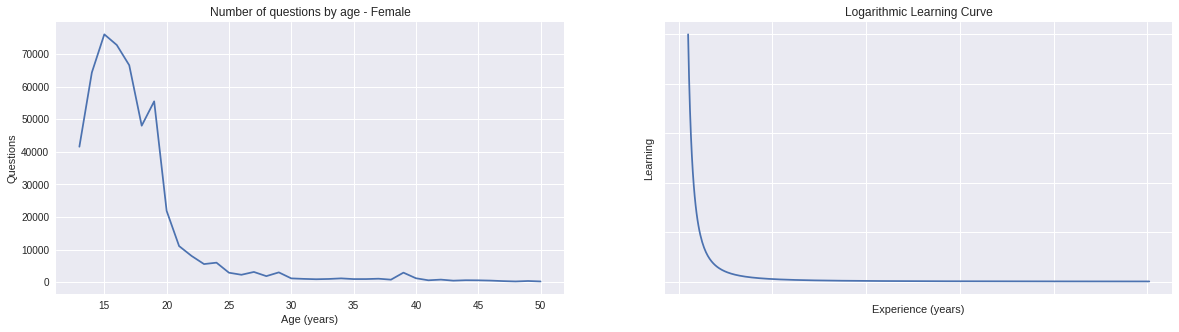

In [32]:
# Group female posts by age
female_age_df = df_dysmenorrhea_posts_female.groupby(['age'])['age'].count()

# Plot 2-column graph for side-by-side comparisson
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5))

# Plot female posts by age
ax1.plot(female_age_df)
ax1.set(xlabel='Age (years)', ylabel='Questions',
       title='Number of questions by age - Female')

# Plot simple Inverse curve to illustrate Learning Curve
x = np.arange(1,16*np.pi,0.1) #start,stop,step
y = 1/(x**2)

ax2.plot(x,y)
ax2.set(xlabel='Experience (years)', ylabel='Learning',
       title='Logarithmic Learning Curve')

# Turn off tick labels
ax2.set_yticklabels([])
ax2.set_xticklabels([])

# Render plot
plt.show()